In [124]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import numpy as np

In [125]:
baseDeDonnees = pd.read_csv("Donnés\weatherstats_montreal_daily (3).csv", index_col = "date")
baseDeDonnees

C:\Users\test8\AppData\Local\Temp\ipykernel_22144\628523788.py:1: DtypeWarning: Columns (46,49) have mixed types. Specify dtype option on import or set low_memory=False.
  baseDeDonnees = pd.read_csv("Donnés\weatherstats_montreal_daily (3).csv", index_col = "date")


,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_humidex,min_windchill,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,min_relative_humidity,...,avg_cloud_cover_4,min_cloud_cover_4,max_cloud_cover_8,avg_hourly_cloud_cover_8,avg_cloud_cover_8,min_cloud_cover_8,max_cloud_cover_10,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10
date,,,,,,,,,,,,,,,,,,,,,
2025-03-09,2.5,-1.95,-2.40,-7.3,NaN,-13.0,90,65.8,68.0,46,...,NaN,NaN,8.0,5.9,4.5,1.0,NaN,NaN,NaN,NaN
2025-03-08,-1.6,-4.54,-4.34,-7.1,NaN,-17.0,64,52.7,54.0,44,...,NaN,NaN,8.0,4.5,4.0,0.0,NaN,NaN,NaN,NaN
2025-03-07,0.8,-4.16,-3.60,-8.0,NaN,-18.0,80,60.0,62.5,45,...,NaN,NaN,8.0,4.6,4.5,1.0,NaN,NaN,NaN,NaN
2025-03-06,6.8,2.28,-0.14,-7.1,NaN,-16.0,95,82.8,80.5,66,...,NaN,NaN,8.0,7.7,7.0,6.0,NaN,NaN,NaN,NaN
2025-03-05,8.7,3.33,4.64,0.6,NaN,NaN,97,90.7,91.5,86,...,NaN,NaN,8.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-10,-11.7,-13.51,-13.64,-15.6,NaN,-26.0,76,65.9,65.0,54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-09,-11.7,-14.01,-15.00,-18.3,NaN,-26.0,79,71.2,72.0,65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-08,-10.6,-13.86,-15.00,-19.4,NaN,-22.0,79,74.8,72.0,65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
baseDeDonnees.apply(pd.isnull).sum()/baseDeDonnees.shape[0]

max_temperature              0.000000
avg_hourly_temperature       0.000000
avg_temperature              0.000000
min_temperature              0.000000
max_humidex                  0.747370
                               ...   
min_cloud_cover_8            0.793073
max_cloud_cover_10           0.994145
avg_hourly_cloud_cover_10    0.994145
avg_cloud_cover_10           0.994145
min_cloud_cover_10           0.994145
Length: 71, dtype: float64

In [127]:
baseDeDonneesNettoyee = baseDeDonnees[["precipitation","snow","rain","max_temperature","min_temperature"]].copy()
baseDeDonneesNettoyee.columns = ["precip","snow","rain","temp_max","temp_min"]
baseDeDonneesNettoyee

,precip,snow,rain,temp_max,temp_min
date,,,,,
2025-03-09,2.4,2.4,0.0,2.5,-7.3
2025-03-08,0.0,0.0,0.0,-1.6,-7.1
2025-03-07,0.0,0.0,0.0,0.8,-8.0
2025-03-06,1.4,0.6,0.8,6.8,-7.1
2025-03-05,6.6,0.0,6.6,8.7,0.6
...,...,...,...,...,...
1970-01-10,0.3,0.5,0.0,-11.7,-15.6
1970-01-09,1.0,1.3,0.0,-11.7,-18.3
1970-01-08,0.8,1.0,0.0,-10.6,-19.4


In [128]:
null_prc = baseDeDonneesNettoyee.apply(pd.isnull).sum()/baseDeDonneesNettoyee.shape[0]
null_prc

precip      0.001241
snow        0.003722
rain        0.004367
temp_max    0.000000
temp_min    0.000000
dtype: float64

In [129]:
#Remplissage des trous de donnés
baseDeDonneesNettoyee["snow"] = baseDeDonneesNettoyee["snow"].fillna(0)
baseDeDonneesNettoyee = baseDeDonneesNettoyee.ffill()
baseDeDonneesNettoyee.apply(pd.isnull).sum()/baseDeDonneesNettoyee.shape[0]
baseDeDonneesNettoyee


,precip,snow,rain,temp_max,temp_min
date,,,,,
2025-03-09,2.4,2.4,0.0,2.5,-7.3
2025-03-08,0.0,0.0,0.0,-1.6,-7.1
2025-03-07,0.0,0.0,0.0,0.8,-8.0
2025-03-06,1.4,0.6,0.8,6.8,-7.1
2025-03-05,6.6,0.0,6.6,8.7,0.6
...,...,...,...,...,...
1970-01-10,0.3,0.5,0.0,-11.7,-15.6
1970-01-09,1.0,1.3,0.0,-11.7,-18.3
1970-01-08,0.8,1.0,0.0,-10.6,-19.4


In [130]:
baseDeDonneesNettoyee.index = pd.to_datetime(baseDeDonneesNettoyee.index)
baseDeDonneesNettoyee.index


DatetimeIndex(['2025-03-09', '2025-03-08', '2025-03-07', '2025-03-06',
               '2025-03-05', '2025-03-04', '2025-03-03', '2025-03-02',
               '2025-03-01', '2025-02-28',
               ...
               '1970-01-15', '1970-01-14', '1970-01-13', '1970-01-12',
               '1970-01-11', '1970-01-10', '1970-01-09', '1970-01-08',
               '1970-01-07', '1970-01-06'],
              dtype='datetime64[ns]', name='date', length=20152, freq=None)

In [131]:
#Verification probleme data
baseDeDonneesNettoyee.apply(lambda x: (x==9999).sum())

precip      0
snow        0
rain        0
temp_max    0
temp_min    0
dtype: int64

<Axes: xlabel='date'>

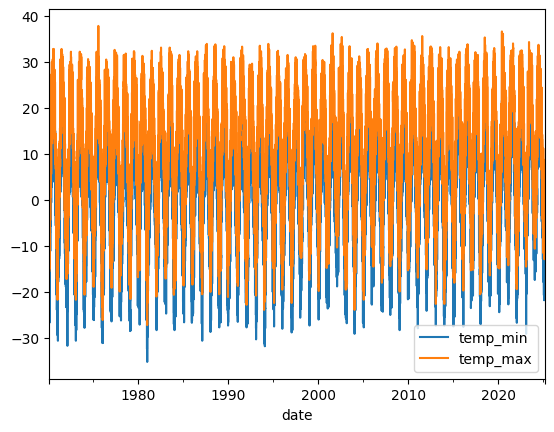

In [153]:
#Analyse pour savoir s'il y a un manque de data.
baseDeDonneesNettoyee[["temp_min","temp_max"]].plot()

In [133]:
#Choisir ce que je veux predire.
baseDeDonneesNettoyee["target_temp_max"] = baseDeDonneesNettoyee.shift(-1)["temp_max"]
baseDeDonneesNettoyee = baseDeDonneesNettoyee.ffill()
#Permet de mettre les dates en ordres.
baseDeDonneesNettoyee = baseDeDonneesNettoyee[::-1]
#Creation de mon model de Ml
reg = Ridge(alpha = .1)
predicteur = ["precip","snow","rain","temp_max","temp_min"]
train = baseDeDonneesNettoyee.loc[:"2023-12-31"]
test = baseDeDonneesNettoyee.loc["2024-01-01":]
reg.fit(train[predicteur],train["target_temp_max"])
predictions = reg.predict(test[predicteur])
baseDeDonneesNettoyee


,precip,snow,rain,temp_max,temp_min,target_temp_max
date,,,,,,
1970-01-06,0.0,0.0,0.0,-10.0,-20.6,-10.0
1970-01-07,0.0,0.0,0.0,-8.3,-23.3,-10.0
1970-01-08,0.8,1.0,0.0,-10.6,-19.4,-8.3
1970-01-09,1.0,1.3,0.0,-11.7,-18.3,-10.6
1970-01-10,0.3,0.5,0.0,-11.7,-15.6,-11.7
...,...,...,...,...,...,...
2025-03-05,6.6,0.0,6.6,8.7,0.6,4.8
2025-03-06,1.4,0.6,0.8,6.8,-7.1,8.7
2025-03-07,0.0,0.0,0.0,0.8,-8.0,6.8


<Axes: xlabel='date'>

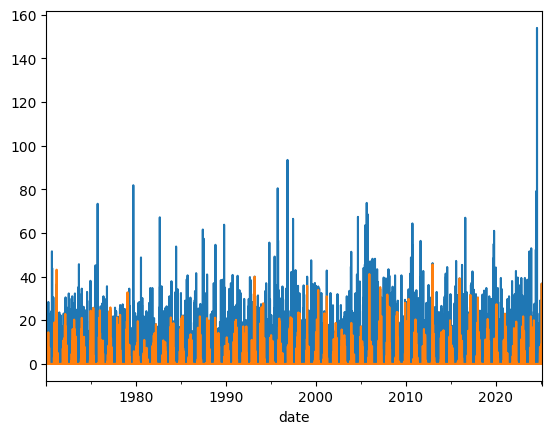

In [134]:
baseDeDonneesNettoyee.index.year.value_counts().sort_index()
baseDeDonneesNettoyee["precip"].plot()
baseDeDonneesNettoyee["snow"].plot()

In [135]:
 #Voir l'erreur de prediction dans le target en question
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test["target_temp_max"],predictions)



2.9335703263048583

,Bonne valeur,Valeur predite
date,,
2024-01-01,-4.2,-0.858546
2024-01-02,-4.5,2.949048
2024-01-03,0.9,5.680366
2024-01-04,1.9,0.215300
2024-01-05,1.6,-2.038465
...,...,...
2025-03-05,4.8,9.486408
2025-03-06,8.7,4.807139
2025-03-07,6.8,1.476521


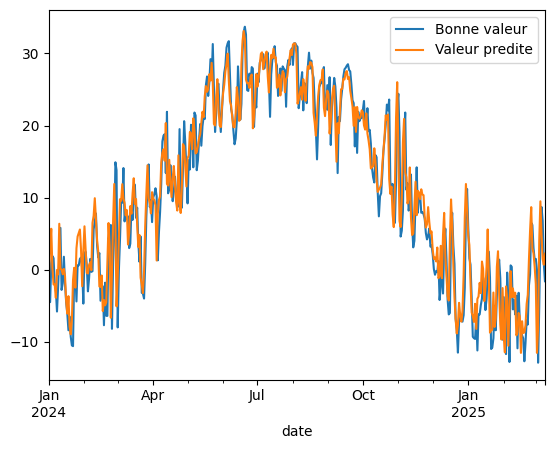

In [136]:
combined = pd.concat([test["target_temp_max"], pd.Series(predictions, index = test.index)],axis=1)
combined.columns=["Bonne valeur","Valeur predite"]
combined.plot()
reg.coef_
combined

In [137]:
#Creer methode de prediction
def creer_UnePrediction(predicteur,baseDeDonneesNettoyee,reg):
    train = baseDeDonneesNettoyee.loc[:"2023-12-31"]
    test = baseDeDonneesNettoyee.loc["2024-01-01":]
    reg.fit(train[predicteur],train["target_temp_max"])
    predictions = reg.predict(test[predicteur])
    error = mean_absolute_error(test["target_temp_max"],predictions)
    combined = pd.concat([test["target_temp_max"], pd.Series(predictions, index = test.index)],axis=1)
    combined.columns=["Bonne valeur","Valeur predite"]
    return error,combined


In [138]:
#Voir la moyenne de temperature par mois
baseDeDonneesNettoyee["mois_temp_max"] = baseDeDonneesNettoyee["temp_max"].rolling(30).mean()

In [139]:
baseDeDonneesNettoyee

,precip,snow,rain,temp_max,temp_min,target_temp_max,mois_temp_max
date,,,,,,,
1970-01-06,0.0,0.0,0.0,-10.0,-20.6,-10.0,NaN
1970-01-07,0.0,0.0,0.0,-8.3,-23.3,-10.0,NaN
1970-01-08,0.8,1.0,0.0,-10.6,-19.4,-8.3,NaN
1970-01-09,1.0,1.3,0.0,-11.7,-18.3,-10.6,NaN
1970-01-10,0.3,0.5,0.0,-11.7,-15.6,-11.7,NaN
...,...,...,...,...,...,...,...
2025-03-05,6.6,0.0,6.6,8.7,0.6,4.8,-3.640000
2025-03-06,1.4,0.6,0.8,6.8,-7.1,8.7,-3.280000
2025-03-07,0.0,0.0,0.0,0.8,-8.0,6.8,-2.826667


In [140]:
#Ajout colonne comparaison temperature max par mois par rapport a la temperature du jour
baseDeDonneesNettoyee["ratio_mois_jour_tempmax"] = baseDeDonneesNettoyee["mois_temp_max"]/baseDeDonneesNettoyee["temp_max"]
#Ajout colonne comparaison entre la temperature max et min.
baseDeDonneesNettoyee["ratio_max_min"] = baseDeDonneesNettoyee["temp_max"]/baseDeDonneesNettoyee["temp_min"]
baseDeDonneesNettoyee

,precip,snow,rain,temp_max,temp_min,target_temp_max,mois_temp_max,ratio_mois_jour_tempmax,ratio_max_min
date,,,,,,,,,
1970-01-06,0.0,0.0,0.0,-10.0,-20.6,-10.0,NaN,NaN,0.485437
1970-01-07,0.0,0.0,0.0,-8.3,-23.3,-10.0,NaN,NaN,0.356223
1970-01-08,0.8,1.0,0.0,-10.6,-19.4,-8.3,NaN,NaN,0.546392
1970-01-09,1.0,1.3,0.0,-11.7,-18.3,-10.6,NaN,NaN,0.639344
1970-01-10,0.3,0.5,0.0,-11.7,-15.6,-11.7,NaN,NaN,0.750000
...,...,...,...,...,...,...,...,...,...
2025-03-05,6.6,0.0,6.6,8.7,0.6,4.8,-3.640000,-0.418391,14.500000
2025-03-06,1.4,0.6,0.8,6.8,-7.1,8.7,-3.280000,-0.482353,-0.957746
2025-03-07,0.0,0.0,0.0,0.8,-8.0,6.8,-2.826667,-3.533333,-0.100000


In [141]:
predicteur = ["precip","snow","temp_max","temp_min","mois_temp_max","ratio_mois_jour_tempmax","ratio_max_min"]

In [142]:
#Enlever les valeurs NaN causer parce nous n'avons pas les valeurs des 30 jours avant pour pouvoir calculer la moyenne de temp_max pour la colonne mois_temp_max.
baseDeDonneesNettoyee = baseDeDonneesNettoyee.iloc[30:,:].copy()
baseDeDonneesNettoyee
#Transforme nos valeur inf et -inf par NaN pour pouvoir les gerer.
baseDeDonneesNettoyee.replace([np.inf, -np.inf], np.nan, inplace=True)
#Remplacer nos valeur NaN par 0 pour ne pas avoir de manque de donnes.
baseDeDonneesNettoyee = baseDeDonneesNettoyee.fillna(0)


In [143]:
error, combined = creer_UnePrediction(predicteur, baseDeDonneesNettoyee, reg)


baseDeDonneesNettoyee

,precip,snow,rain,temp_max,temp_min,target_temp_max,mois_temp_max,ratio_mois_jour_tempmax,ratio_max_min
date,,,,,,,,,
1970-02-05,0.0,0.0,0.0,-6.7,-21.7,-18.3,-8.880000,1.325373,0.308756
1970-02-06,0.3,0.3,0.0,0.6,-10.6,-6.7,-8.583333,-14.305556,-0.056604
1970-02-07,0.0,0.0,0.0,1.1,-12.8,0.6,-8.193333,-7.448485,-0.085938
1970-02-08,0.0,0.0,0.0,2.2,-13.9,1.1,-7.730000,-3.513636,-0.158273
1970-02-09,0.0,0.0,0.0,-0.6,-10.0,2.2,-7.360000,12.266667,0.060000
...,...,...,...,...,...,...,...,...,...
2025-03-05,6.6,0.0,6.6,8.7,0.6,4.8,-3.640000,-0.418391,14.500000
2025-03-06,1.4,0.6,0.8,6.8,-7.1,8.7,-3.280000,-0.482353,-0.957746
2025-03-07,0.0,0.0,0.0,0.8,-8.0,6.8,-2.826667,-3.533333,-0.100000


In [144]:
error

2.819855817276169

In [145]:
reg.coef_


array([ 0.00161079, -0.14028262,  0.39413289,  0.34714392,  0.27325458,
       -0.00302025,  0.002847  ])

In [146]:
combined["diff"] = (combined["Bonne valeur"] - combined["Valeur predite"]).abs()
combined

,Bonne valeur,Valeur predite,diff
date,,,
2024-01-01,-4.2,-0.779595,3.420405
2024-01-02,-4.5,2.149856,6.649856
2024-01-03,0.9,4.189250,3.289250
2024-01-04,1.9,0.242267,1.657733
2024-01-05,1.6,-1.444199,3.044199
...,...,...,...
2025-03-05,4.8,5.887068,1.087068
2025-03-06,8.7,2.427219,6.272781
2025-03-07,6.8,-0.032562,6.832562


In [147]:
combined.sort_values("diff",ascending=False).head()
baseDeDonneesNettoyee

,precip,snow,rain,temp_max,temp_min,target_temp_max,mois_temp_max,ratio_mois_jour_tempmax,ratio_max_min
date,,,,,,,,,
1970-02-05,0.0,0.0,0.0,-6.7,-21.7,-18.3,-8.880000,1.325373,0.308756
1970-02-06,0.3,0.3,0.0,0.6,-10.6,-6.7,-8.583333,-14.305556,-0.056604
1970-02-07,0.0,0.0,0.0,1.1,-12.8,0.6,-8.193333,-7.448485,-0.085938
1970-02-08,0.0,0.0,0.0,2.2,-13.9,1.1,-7.730000,-3.513636,-0.158273
1970-02-09,0.0,0.0,0.0,-0.6,-10.0,2.2,-7.360000,12.266667,0.060000
...,...,...,...,...,...,...,...,...,...
2025-03-05,6.6,0.0,6.6,8.7,0.6,4.8,-3.640000,-0.418391,14.500000
2025-03-06,1.4,0.6,0.8,6.8,-7.1,8.7,-3.280000,-0.482353,-0.957746
2025-03-07,0.0,0.0,0.0,0.8,-8.0,6.8,-2.826667,-3.533333,-0.100000


In [148]:
#a comprendre
dernieres_donnees = baseDeDonneesNettoyee.iloc[-1][predicteur].values.reshape(1, -1)

# Faire la prédiction pour demain
prediction_demain = reg.predict(dernieres_donnees)[0]

# Obtenir la date de demain
date_demain = baseDeDonneesNettoyee.index[-1] + pd.Timedelta(days=1)

# Afficher la prédiction
print(f"Prédiction pour {date_demain.date()} : {prediction_demain:.2f}°C")

Prédiction pour 2025-03-10 : 0.54°C


C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
